In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py 
import math
import glob
import os
import netCDF4 as cdf
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, interp
import scipy.stats as stats
from sklearn.decomposition import IncrementalPCA
from mpl_toolkits.basemap import Basemap
import warnings
from sklearn.metrics import mean_squared_error
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
dataf_aug = pd.read_pickle('albedo_sza_tilstra_2009_08')
dataf_jan = pd.read_pickle('albedo_sza_tilstra_2009_01')
dataf_apr = pd.read_pickle('albedo_sza_tilstra_2009_04')
#print dataf_aug.shape,dataf_jan.shape
#print dataf_apr

In [3]:
#dataf_aug['Albedo Tilstra'].loc[(dataf_aug['lat']==[24.953906])&(dataf_aug['lon']==[11.981741])]

dataf_aug.head()

,lat,lon,days,Fs,Albedo Anomaly,Albedo Sif,Albedo Tilstra,SZA,SZAangle
0,[25.643969],[12.215619],1,0.539747,-0.203869,0.375057,0.578926,0.433629,24.845108
1,[25.839022],[11.471953],1,0.323144,-0.059560,0.338626,0.398186,0.445883,25.547199
2,[25.298731],[12.099149],1,-0.153187,-0.159603,0.419323,0.578926,0.433759,24.852585
3,[25.686708],[10.60046],1,-0.656442,0.000240,0.363999,0.363759,0.458455,26.267519
4,[25.87573],[9.84359],1,-0.076174,0.037693,0.306400,0.268707,0.470521,26.958868


In [119]:
daily_fs = []
for i in range(1,32):
    daily_fs.append(dataf_jan['Fs'].loc[dataf_jan['days']==i].mean())


jan


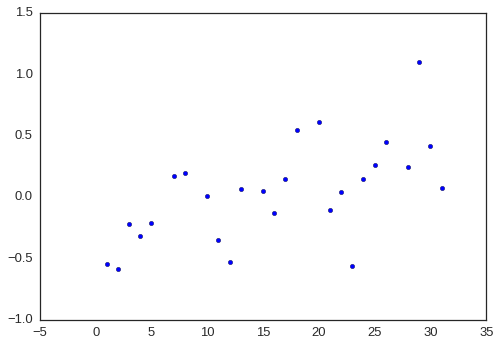

In [116]:
#plt.scatter(range(1,len(daily_fs)+1),daily_fs)  
print 'jan'

In [120]:
#plt.plot(range(1,len(daily_fs)+1),daily_fs)  
print 'apr'

apr


In [121]:
#plt.plot(range(1,len(daily_fs)+1),daily_fs)  
print 'Aug'

Aug


In [4]:
def filtering_fs_outliers(df):
    matched  = df
    
    StdA     = matched['Fs'].std()
    meanA    = matched['Fs'].mean()
    minA     = matched['Fs'].min()
    maxA     = matched['Fs'].max()
    medianA  = matched['Fs'].median()

    print 'prior shape',matched.shape
    
    cols     = [str(i) for i in matched.columns]
    i_list   = matched.loc[(matched['Fs']>(meanA+StdA)),cols].index.values
    i_list   = np.append((matched.loc[(matched['Fs']<(meanA-StdA)),cols].index.values),i_list)
    i_list   = np.sort(i_list)
   
    new_match = matched.drop(matched.index[i_list])
    print 'posterior shape', new_match.shape
    return new_match

In [30]:
#dataf_aug = filtering_fs_outliers(dataf_aug)
#dataf_jan = filtering_fs_outliers(dataf_jan)

prior shape (730, 9)
posterior shape (500, 9)


In [7]:
#dataf_aug['SZAangle'] = np.rad2deg(dataf_aug['SZA'])
#dataf_jan['SZAangle'] = np.rad2deg(dataf_jan['SZA'])
dataf_aug.head()

,lat,lon,days,Fs,Albedo Anomaly,Albedo Sif,Albedo Tilstra,SZA,SZAangle
0,[25.643969],[12.215619],1,0.539747,-0.203869,0.375057,0.578926,0.433629,24.845108
1,[25.839022],[11.471953],1,0.323144,-0.059560,0.338626,0.398186,0.445883,25.547199
2,[25.298731],[12.099149],1,-0.153187,-0.159603,0.419323,0.578926,0.433759,24.852585
3,[25.686708],[10.60046],1,-0.656442,0.000240,0.363999,0.363759,0.458455,26.267519
4,[25.87573],[9.84359],1,-0.076174,0.037693,0.306400,0.268707,0.470521,26.958868


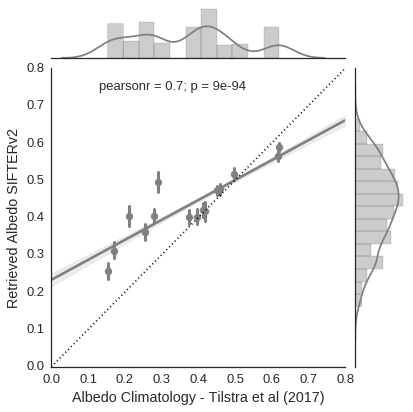

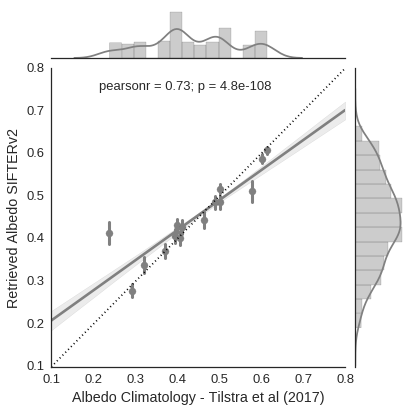

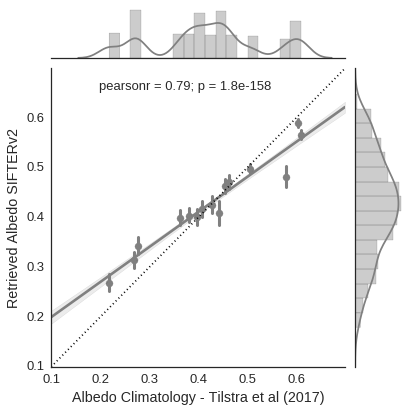

In [10]:
# Correlation between albedos
#fig = plt.figure(1,figsize=(10,6))
ax  = sns.jointplot(dataf_jan['Albedo Tilstra'],dataf_jan['Albedo Sif'],x_estimator=np.mean,kind='reg',color='grey')
x0, x1 = ax.ax_joint.get_xlim()
y0, y1 = ax.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.ax_joint.plot(lims, lims, ':k')   
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.xlabel('Albedo Climatology - Tilstra et al (2017)')
plt.ylabel('Retrieved Albedo SIFTERv2')
ax.savefig('/usr/people/botiabo/albedo_corr_jan.png') 

ax  = sns.jointplot(dataf_apr['Albedo Tilstra'],dataf_apr['Albedo Sif'],x_estimator=np.mean,kind='reg',color='grey')
x0, x1 = ax.ax_joint.get_xlim()
y0, y1 = ax.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.ax_joint.plot(lims, lims, ':k')   
plt.xlim(0.1,0.8)
plt.ylim(0.1,0.8)
plt.xlabel('Albedo Climatology - Tilstra et al (2017)')
plt.ylabel('Retrieved Albedo SIFTERv2')
ax.savefig('/usr/people/botiabo/albedo_corr_apr.png') 

ax  = sns.jointplot(dataf_aug['Albedo Tilstra'],dataf_aug['Albedo Sif'],x_estimator=np.mean,kind='reg',color='grey')
ax.set_axis_labels(ylabel='Retrieved Albedo SIFTERv2',xlabel='Albedo Climatology Tilstra')
sns.set(font_scale=1.3)
sns.set_style('white')
plt.xlim(0.1,0.7)
plt.ylim(0.1,0.7)
plt.xlabel('Albedo Climatology - Tilstra et al (2017)')
plt.ylabel('Retrieved Albedo SIFTERv2')
x0, x1 = ax.ax_joint.get_xlim()
y0, y1 = ax.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.ax_joint.plot(lims, lims, ':k')    
plt.show()
ax.savefig('/usr/people/botiabo/albedo_corr_aug.png') 
#sns.jointplot(dataf_jan['Albedo Tilstra'],dataf_jan['Albedo Sif'],kind='reg',x_estimator=np.mean,color='grey')
#sns.lmplot(x='Albedo Tilstra',y='Albedo Sif', data=dataf_aug, x_estimator=np.mean)

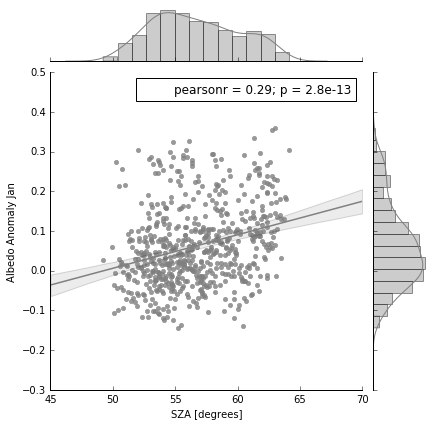

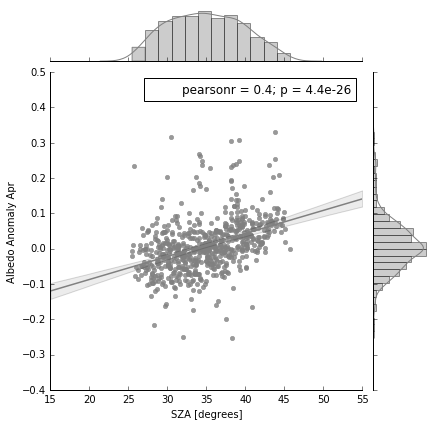

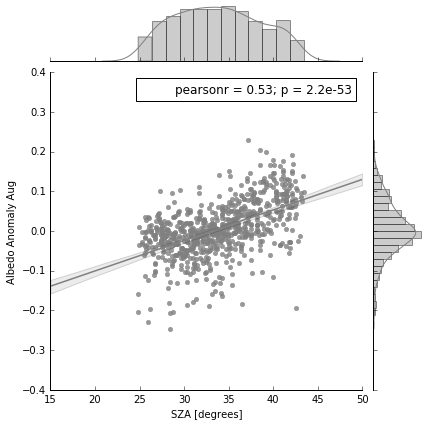

In [22]:
x = dataf_jan['SZAangle']
y = dataf_jan['Albedo Anomaly']
sns.jointplot(x,y,kind='reg',color='grey')
plt.xlabel('SZA [degrees]')
plt.ylabel('Albedo Anomaly Jan')

x = dataf_apr['SZAangle']
y = dataf_apr['Albedo Anomaly']
sns.jointplot(x,y,kind='reg',color='grey')
plt.xlabel('SZA [degrees]')
plt.ylabel('Albedo Anomaly Apr')

x = dataf_aug['SZAangle']
y = dataf_aug['Albedo Anomaly']
sns.jointplot(x,y,kind='reg',color='grey')
plt.xlabel('SZA [degrees]')
plt.ylabel('Albedo Anomaly Aug')

In [21]:
dataf_apr.head()

,lat,lon,days,Fs,Albedo Anomaly,Albedo Sif,Albedo Tilstra,SZA,SZAangle
0,[23.276508],[12.424061],1,-1.908702,-0.001940,0.600795,0.602735,0.797641,45.701447
1,[24.339372],[10.857797],2,-0.392045,0.003555,0.375195,0.371640,0.537574,30.800709
2,[24.531566],[10.119509],2,1.276829,0.041335,0.412976,0.371640,0.549460,31.481752
3,[23.649966],[10.624573],2,0.098245,0.041924,0.505689,0.463765,0.533180,30.548962
4,[23.145757],[9.674318],2,-0.971979,0.091867,0.594399,0.502532,0.540958,30.994608


In [20]:
print dataf_jan['SZAangle'].mean(),dataf_apr['SZAangle'].mean(),dataf_aug['SZAangle'].mean()
print (dataf_jan['Fs'].loc[dataf_jan['Fs']<0]).mean(),(dataf_apr['Fs'].loc[dataf_apr['Fs']<0]).mean(),(dataf_aug['Fs'].loc[dataf_aug['Fs']<0]).mean()

56.6289193132 34.9314204441 33.8363680534
-0.729576669125 -1.01859906559 -1.00512786258


aug


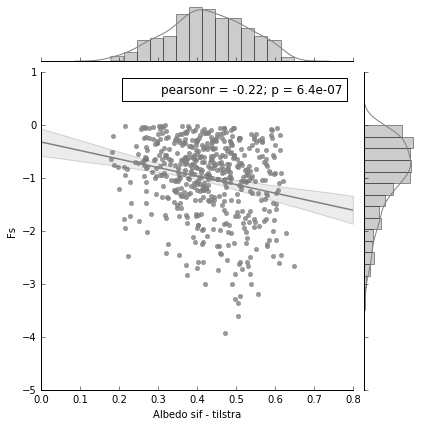

In [27]:
x = dataf_aug['Albedo Sif'].loc[dataf_aug['Fs']<0]
y = dataf_aug['Fs'].loc[dataf_aug['Fs']<0]

#xx = dataf_jan['Albedo Anomaly'].loc[dataf_jan['Fs']<0]
#yy = dataf_jan['Fs'].loc[dataf_jan['Fs']<0]

print 'aug'
#sns.jointplot(xx,yy,kind='reg',color='grey')
#lt.xlabel('Albedo sif - tilstra')
sns.jointplot(x,y,kind='reg',color='grey')
plt.xlabel('Albedo sif - tilstra')

#sns.jointplot(dataf_aug['Albedo Anomaly'],dataf_aug['Fs'],kind='reg',color='grey')
#plt.xlabel('Albedo sif - tilstra')

plt.show()

aug


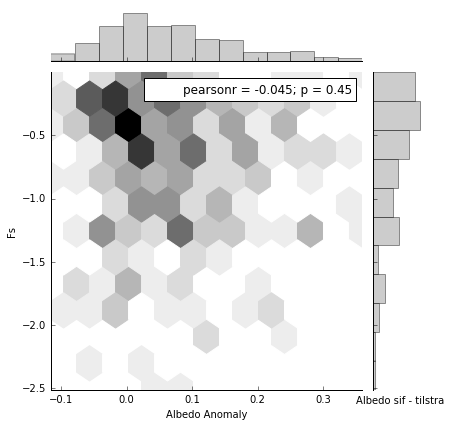

In [6]:
x = dataf_jan['Albedo Anomaly'].loc[dataf_jan['Fs']<0]
y = dataf_jan['Fs'].loc[dataf_jan['Fs']<0]

#xx = dataf_jan['Albedo Anomaly'].loc[dataf_jan['Fs']<0]
#yy = dataf_jan['Fs'].loc[dataf_jan['Fs']<0]

print 'aug'
#sns.jointplot(xx,yy,kind='reg',color='grey')
#lt.xlabel('Albedo sif - tilstra')
sns.jointplot(x,y,kind='hex',color='grey')
#plt.xlabel('Albedo sif - tilstra')

#sns.jointplot(dataf_aug['Albedo Anomaly'],dataf_aug['Fs'],kind='reg',color='grey')
#plt.xlabel('Albedo sif - tilstra')

plt.show()

apr


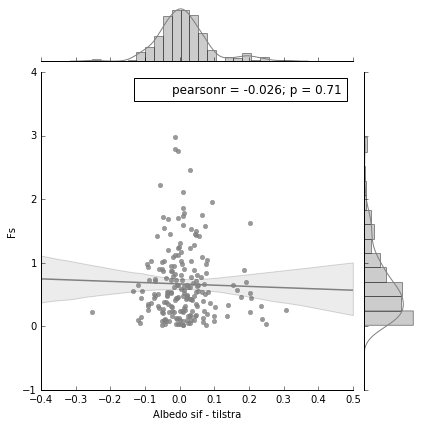

In [12]:
x = dataf_apr['Albedo Anomaly'].loc[dataf_apr['Fs']>0]
y = dataf_apr['Fs'].loc[dataf_apr['Fs']>0]

#xx = dataf_jan['Albedo Anomaly'].loc[dataf_jan['Fs']<0]
#yy = dataf_jan['Fs'].loc[dataf_jan['Fs']<0]

print 'apr'
#sns.jointplot(xx,yy,kind='reg',color='grey')
#lt.xlabel('Albedo sif - tilstra')
sns.jointplot(x,y,kind='reg',color='grey')
plt.xlabel('Albedo sif - tilstra')

#sns.jointplot(dataf_aug['Albedo Anomaly'],dataf_aug['Fs'],kind='reg',color='grey')
#plt.xlabel('Albedo sif - tilstra')

plt.show()

aug


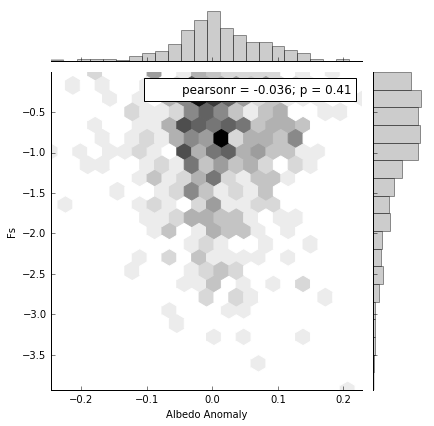

In [5]:
x = dataf_aug['Albedo Anomaly'].loc[dataf_aug['Fs']<0]
y = dataf_aug['Fs'].loc[dataf_aug['Fs']<0]

#xx = dataf_jan['Albedo Anomaly'].loc[dataf_jan['Fs']<0]
#yy = dataf_jan['Fs'].loc[dataf_jan['Fs']<0]

print 'aug'
#sns.jointplot(xx,yy,kind='reg',color='grey')
#lt.xlabel('Albedo sif - tilstra')
sns.jointplot(x,y,kind='hex',color='grey')
#plt.xlabel('Albedo sif - tilstra')

#sns.jointplot(dataf_aug['Albedo Anomaly'],dataf_aug['Fs'],kind='reg',color='grey')
#plt.xlabel('Albedo sif - tilstra')

plt.show()

aug


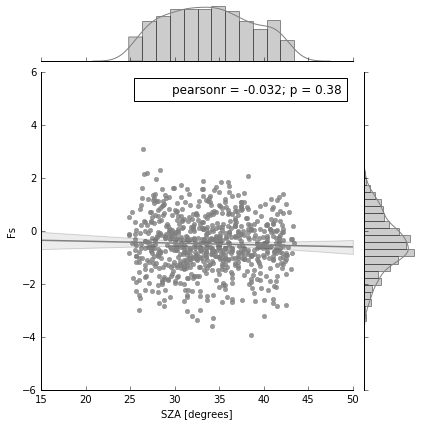

In [41]:
xx = dataf_aug['SZAangle']#.loc[dataf_aug['Fs']<0]
yy = dataf_aug['Fs']#.loc[dataf_aug['Fs']<0]
print 'aug'
sns.jointplot(xx,yy,kind='reg',color='grey')
plt.xlabel('SZA [degrees]')

#sns.jointplot(dataf_aug['Albedo Anomaly'],dataf_aug['Fs'],kind='reg',color='grey')
#plt.xlabel('Albedo sif - tilstra')

plt.show()

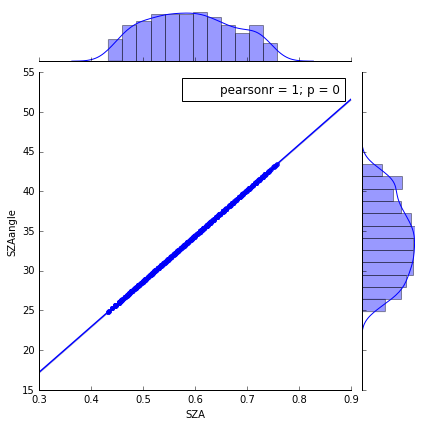

In [37]:
sns.jointplot(dataf_aug['SZA'],dataf_aug['SZAangle'],kind='reg')

0.0619680845018


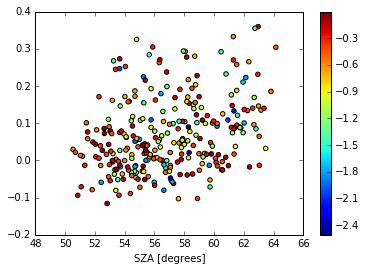

In [53]:
angle = 70
x = dataf_jan['SZAangle'].loc[(dataf_jan['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
y = dataf_jan['Fs'].loc[(dataf_jan['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
z = dataf_jan['Albedo Anomaly'].loc[(dataf_jan['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
plt.scatter(x,z,c=y)
plt.colorbar()
plt.xlabel('SZA [degrees]')
print dataf_jan['Albedo Anomaly'].mean()

0.0100073801644


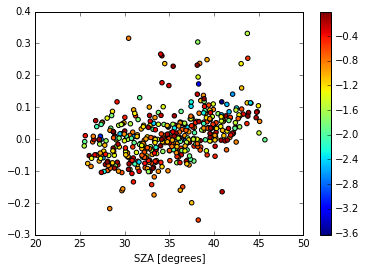

In [52]:
angle = 70
x = dataf_apr['SZAangle'].loc[(dataf_apr['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
y = dataf_apr['Fs'].loc[(dataf_apr['Fs']<0) ]#& (dataf_aug['SZAangle']<angle)]
z = dataf_apr['Albedo Anomaly'].loc[(dataf_apr['Fs']<0) ]#& (dataf_aug['SZAangle']<angle)]
plt.scatter(x,z,c=y)
plt.colorbar()
plt.xlabel('SZA [degrees]')
print dataf_apr['Albedo Anomaly'].mean()

0.00566084476253


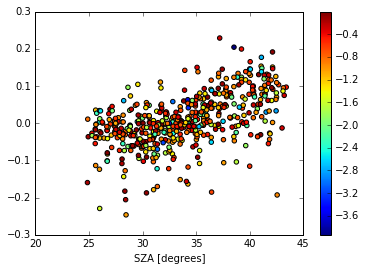

In [48]:
angle = 70
x = dataf_aug['SZAangle'].loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
y = dataf_aug['Fs'].loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
z = dataf_aug['Albedo Anomaly'].loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
plt.scatter(x,z,c=y)
plt.colorbar()
plt.xlabel('SZA [degrees]')
print dataf_aug['Albedo Anomaly'].mean()

0.00566084476253


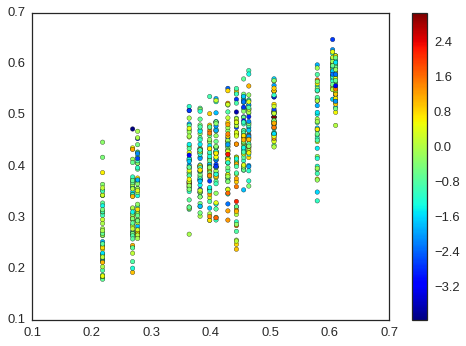

In [61]:
x = dataf_aug['Albedo Sif']#.loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
y = dataf_aug['Fs']#.loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
z = dataf_aug['Albedo Tilstra']#.loc[(dataf_aug['Fs']<0)]# & (dataf_aug['SZAangle']<angle)]
plt.scatter(z,x,c=y,cmap='jet')
plt.colorbar()
#plt.xlabel('SZA [degrees]')
print dataf_aug['Albedo Anomaly'].mean()

In [58]:
aug_daily_sza = []
aug_daily_fs  = []
for i in range(1,32):
    aug_daily_sza.append(dataf_aug['SZAangle'].loc[dataf_aug['days']==i].mean())
    aug_daily_fs.append(dataf_aug['Fs'].loc[dataf_aug['days']==i].mean())

In [65]:
print len(aug_daily_fs), len(aug_daily_sza)

31 31


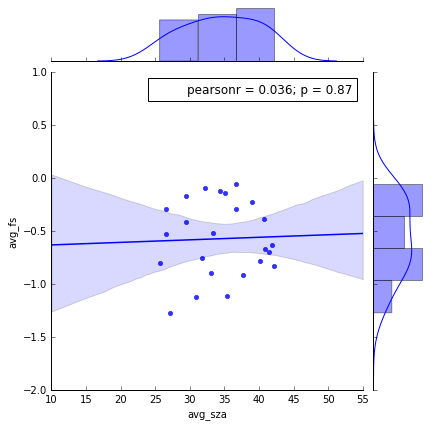

In [69]:
d = pd.DataFrame()
d['avg_sza'] = np.array(aug_daily_sza)
d['avg_fs'] = np.array(aug_daily_fs)

x = d['avg_sza'].loc[d['avg_fs']<0]
y = d['avg_fs'].loc[d['avg_fs']<0]

sns.jointplot(x,y,kind='reg')